# Laptop Prices

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load csv file 
df = pd.read_csv('../datasets/laptop_price.csv',encoding="ISO-8859-1")

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [6]:
df = df.drop('laptop_ID',axis=1)

## Price

<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

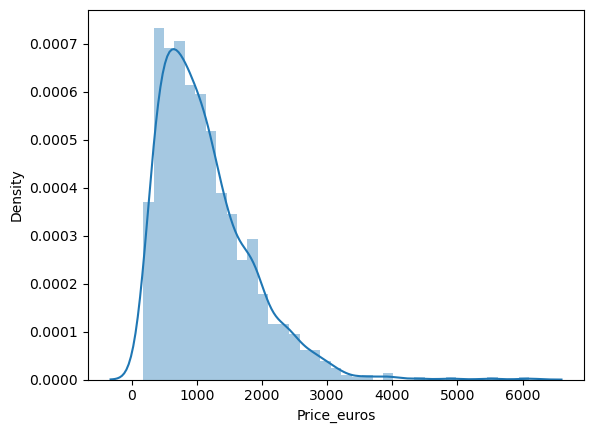

In [7]:
sns.distplot(df['Price_euros'])

### Company

<AxesSubplot:xlabel='count', ylabel='Company'>

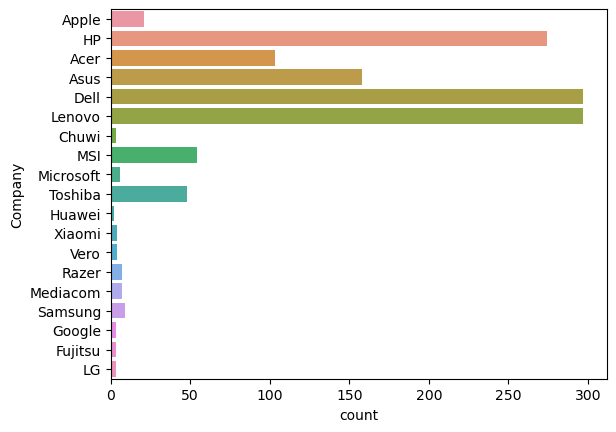

In [8]:
sns.countplot(y=df['Company'])

In [9]:
df.groupby('Company')['Price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Acer,103.0,626.775825,375.671363,174.00,385.5000,559.00,774.5000,2599.00
Apple,21.0,1564.198571,561.623595,898.94,1163.0000,1339.69,1958.9000,2858.00
Asus,158.0,1104.169367,702.490232,191.90,537.2500,1012.50,1488.2500,3975.00
Chuwi,3.0,314.296667,116.672889,244.99,246.9450,248.90,348.9500,449.00
Dell,297.0,1186.068990,672.941227,274.90,735.0700,985.00,1472.2000,3659.40
Fujitsu,3.0,729.000000,75.498344,649.00,694.0000,739.00,769.0000,799.00
Google,3.0,1677.666667,473.292017,1275.00,1417.0000,1559.00,1879.0000,2199.00
HP,274.0,1067.774854,617.508031,209.00,615.9975,966.50,1389.0000,4389.00
Huawei,2.0,1424.000000,106.066017,1349.00,1386.5000,1424.00,1461.5000,1499.00


<AxesSubplot:xlabel='Price_euros', ylabel='Company'>

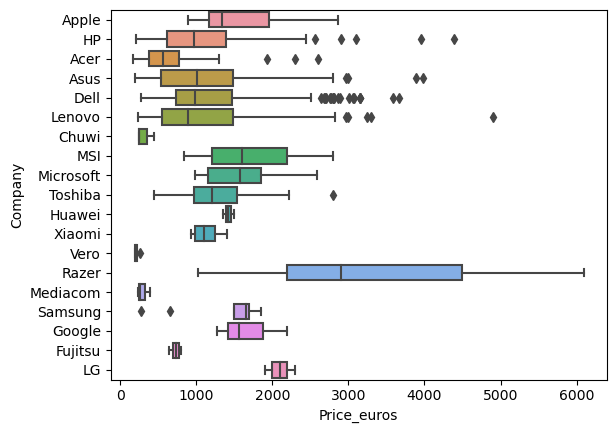

In [10]:
sns.boxplot(data=df, y='Company', x='Price_euros')

### Typename

<AxesSubplot:xlabel='count', ylabel='TypeName'>

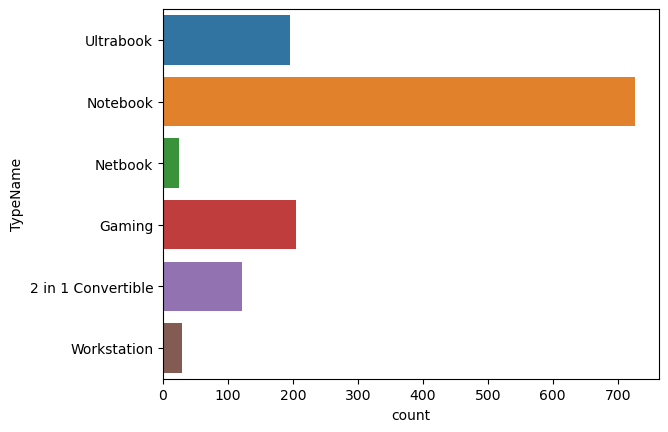

In [11]:
sns.countplot(data=df, y='TypeName')

In [12]:
df.groupby('TypeName')['Price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
TypeName,,,,,,,,
2 in 1 Convertible,121.0,1282.401653,613.412864,275.0,795.990,1199.0,1799.0,2824.0
Gaming,205.0,1731.380634,814.174430,699.0,1169.000,1492.8,2199.0,6099.0
Netbook,25.0,636.232000,581.285898,174.0,265.000,340.0,744.0,1908.0
Notebook,727.0,782.078624,443.972330,196.0,469.005,691.0,979.0,4899.0
Ultrabook,196.0,1548.230357,489.402456,499.0,1149.000,1499.0,1869.0,3100.0
Workstation,29.0,2280.358966,712.643531,1369.0,1855.000,2064.9,2445.0,4389.0


<AxesSubplot:xlabel='Price_euros', ylabel='TypeName'>

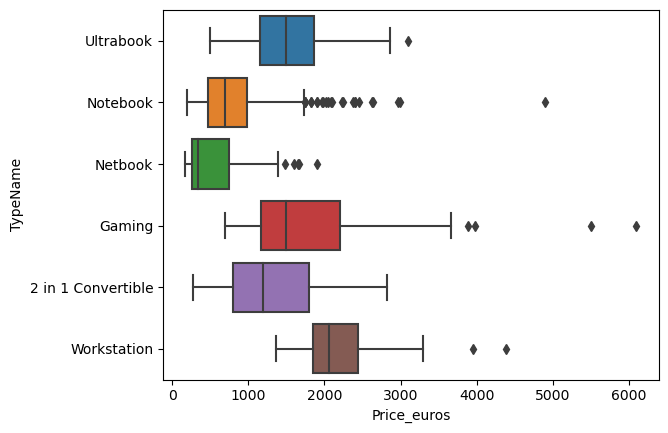

In [13]:
sns.boxplot(data=df, x='Price_euros', y='TypeName')

### Inches

<AxesSubplot:xlabel='count', ylabel='Inches'>

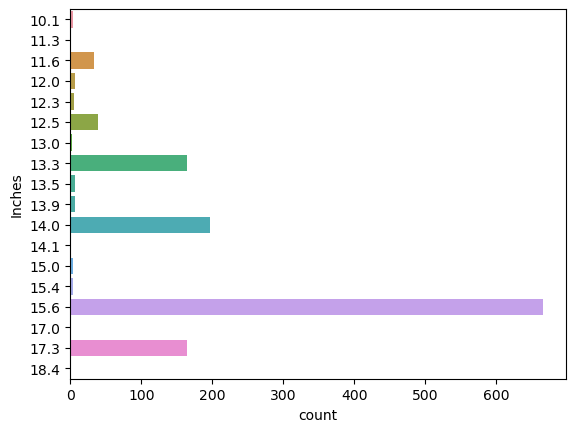

In [14]:
sns.countplot(y=df['Inches'])

Text(0.5, 1.0, 'Distribution of Inches')

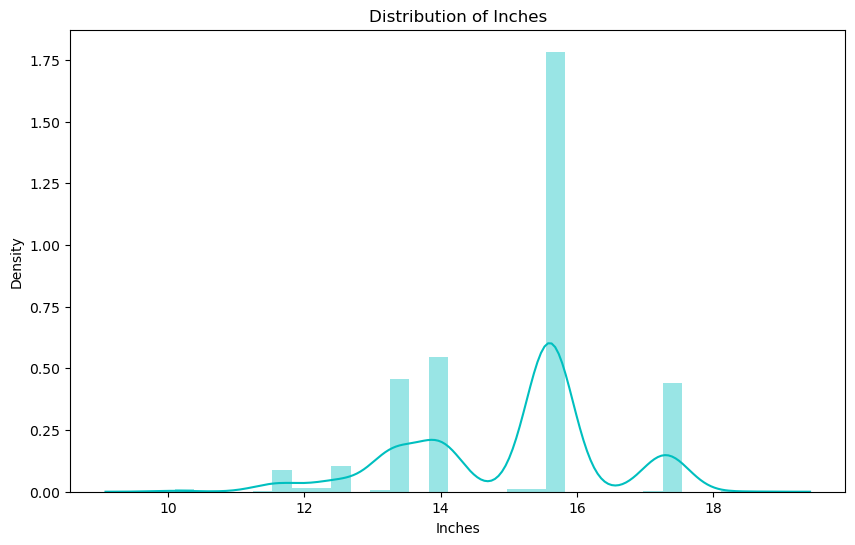

In [15]:
f, ax = plt.subplots(1,1, figsize=(10, 6))
ax = sns.distplot(df['Inches'], kde = True, color = 'c')
plt.title('Distribution of Inches')

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

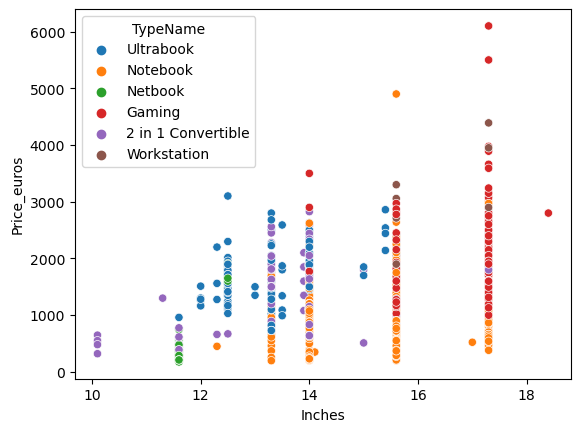

In [16]:
sns.scatterplot(x=df['Inches'],y=df['Price_euros'],hue=df['TypeName'])

In [17]:
df.corr()['Price_euros']

Inches         0.068197
Price_euros    1.000000
Name: Price_euros, dtype: float64

## ScreenResolution

In [18]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)


<AxesSubplot:xlabel='Touchscreen', ylabel='count'>

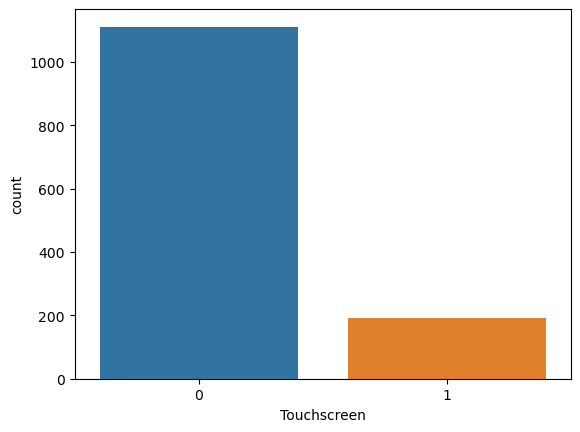

In [19]:
sns.countplot(x=df['Touchscreen'])

<AxesSubplot:xlabel='Touchscreen', ylabel='Price_euros'>

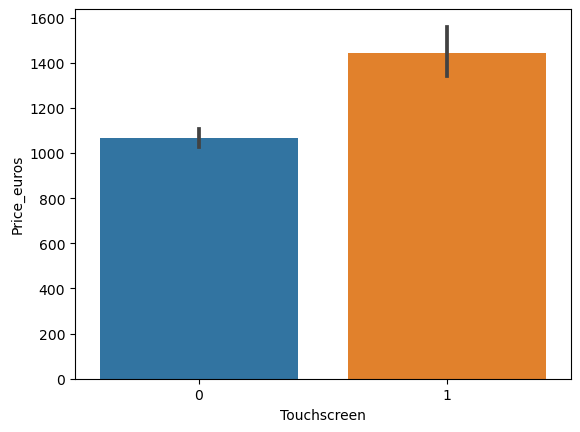

In [20]:
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

In [21]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<AxesSubplot:xlabel='Ips', ylabel='count'>

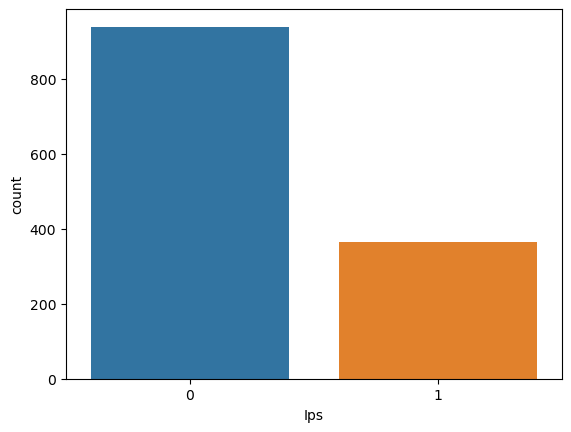

In [22]:
sns.countplot(x=df['Ips'])

<AxesSubplot:xlabel='Ips', ylabel='Price_euros'>

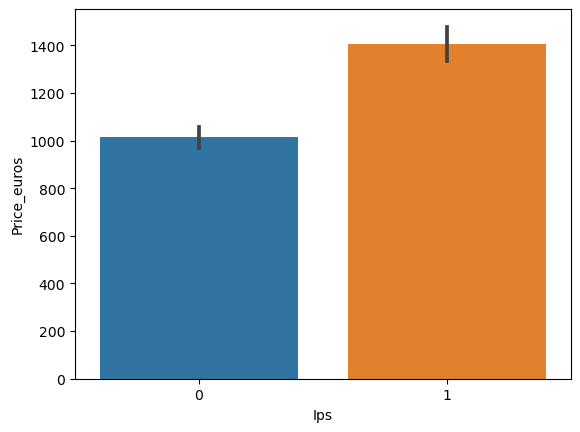

In [23]:
sns.barplot(x=df['Ips'],y=df['Price_euros'])

In [24]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [25]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [26]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [27]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [28]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,2560,1600


In [29]:
# Pixels per inch
df['ppi'] = (((df['X_res'] **2) + (df['Y_res'] **2)) **0.5) / df['Inches'].astype('float')

In [30]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005


## CPU

In [31]:
df['CpuName'] = df['Cpu'].apply(lambda x :" " .join(x.split()[:3]))

In [32]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [33]:
df['Cpu brand'] = df['CpuName'].apply(fetch_processor)

In [34]:
df.drop(columns = ['Cpu', 'CpuName'], inplace = True)

In [35]:
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand
0,Apple,MacBook Pro,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5


<AxesSubplot:xlabel='count', ylabel='Cpu brand'>

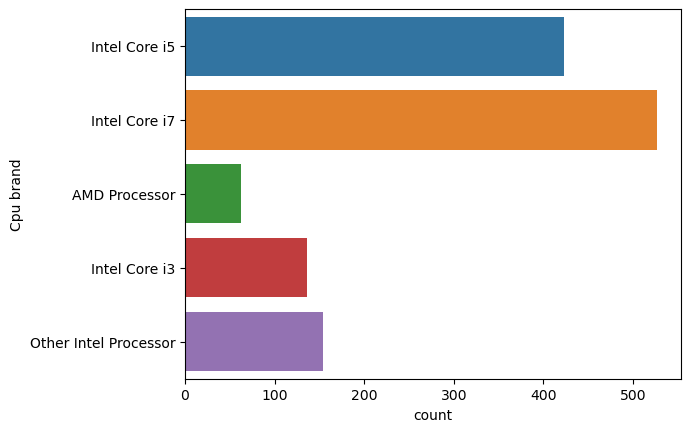

In [36]:
sns.countplot(y=df['Cpu brand'])

<AxesSubplot:xlabel='Price_euros', ylabel='Cpu brand'>

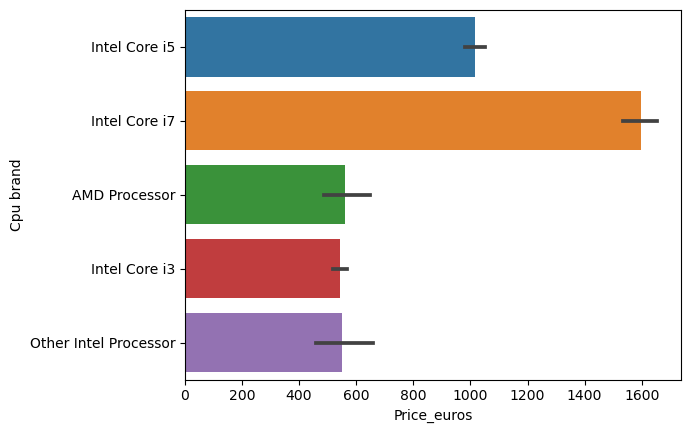

In [37]:
sns.barplot(y=df['Cpu brand'],x=df['Price_euros'])

## Ram

In [38]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype('int32')

In [39]:
df['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

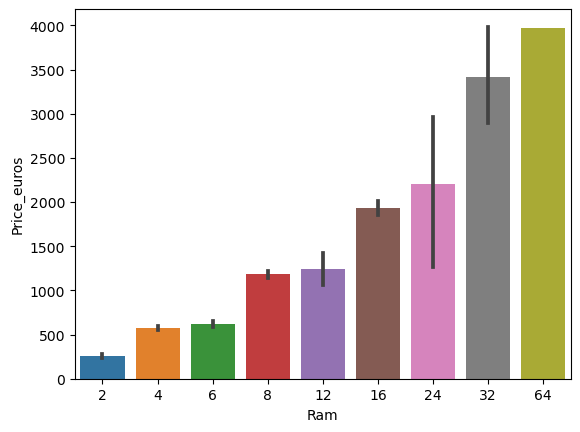

In [40]:
sns.barplot(x=df['Ram'],y=df['Price_euros'])

## Memory

In [41]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex = True)

#Replacing GB to ''(null or empty)
df['Memory'] = df['Memory'].str.replace('GB', '')

#Replacing TB to 000 (1TB = 1000GB)
df['Memory'] = df['Memory'].str.replace('TB', '000')

In [42]:
new = df['Memory'].str.split('+', n=1, expand =True)
df['first'] = new[0]
df["first"]=df["first"].str.strip()

In [43]:
df['second'] = new[1]

In [44]:
df['Layer1hdd'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1ssd'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)

In [45]:
df['first'] = df['first'].str.replace(r'\D', '')

In [46]:
df["second"].fillna("0", inplace = True)
df["Layer2hdd"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2ssd"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df['second'] = df['second'].str.replace(r'\D', '')

In [47]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [48]:
df["HDD"]=(df["first"]*df["Layer1hdd"]+df["second"]*df["Layer2hdd"])
df["SSD"]=(df["first"]*df["Layer1ssd"]+df["second"]*df["Layer2ssd"])

In [49]:
df.drop(columns=['first', 'second', 'Layer1hdd', 'Layer1ssd',
                 'Layer2hdd', 'Layer2ssd'],inplace=True)

In [50]:
df.drop(columns = 'Memory', inplace = True)

In [51]:
df.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5,0,128
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5,0,0
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5,0,256
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7,0,512
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5,0,256


## GPU

In [52]:
df['Gpu brand']  = df['Gpu'].apply(lambda x:x.split()[0])

In [53]:
df = df[df['Gpu brand'] != 'ARM']

<AxesSubplot:xlabel='count', ylabel='Gpu brand'>

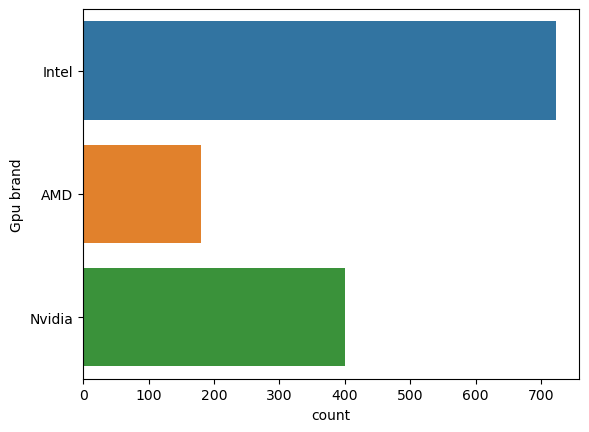

In [54]:
sns.countplot(y=df['Gpu brand'])

<AxesSubplot:xlabel='Gpu brand', ylabel='Price_euros'>

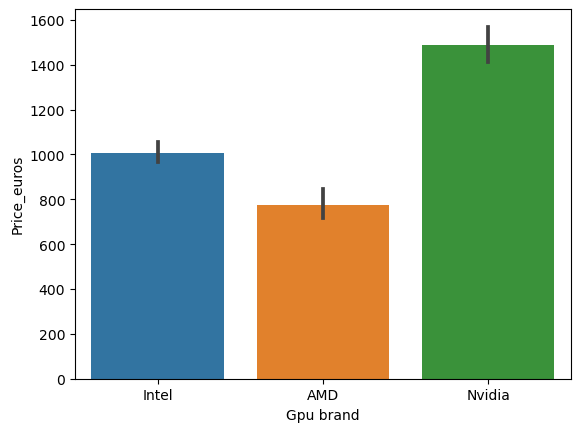

In [55]:
sns.barplot(x=df['Gpu brand'],y=df['Price_euros'])

In [56]:
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


<AxesSubplot:xlabel='count', ylabel='OpSys'>

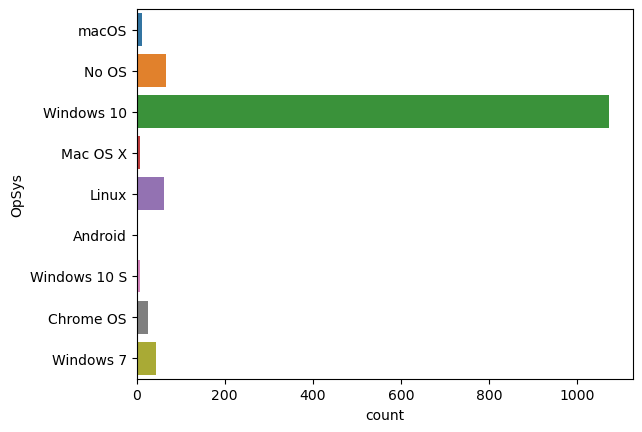

In [57]:
sns.countplot(y=df['OpSys'])

In [58]:
def cat_os(os):
    if os == 'Windows 10' or os == 'Windows 7' or os == 'Windows 10 S':
        return 'Windows'
    elif os == 'Mac OS X' or os == 'macOS':
        return 'Mac'
    elif os == 'Linux':
        return 'Linux'
    elif os == 'No OS':
        return 'No OS'
    else:
        return 'others'

In [59]:
df['OS'] = df['OpSys'].apply(cat_os)

In [60]:
df.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,No OS
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<AxesSubplot:xlabel='count', ylabel='OS'>

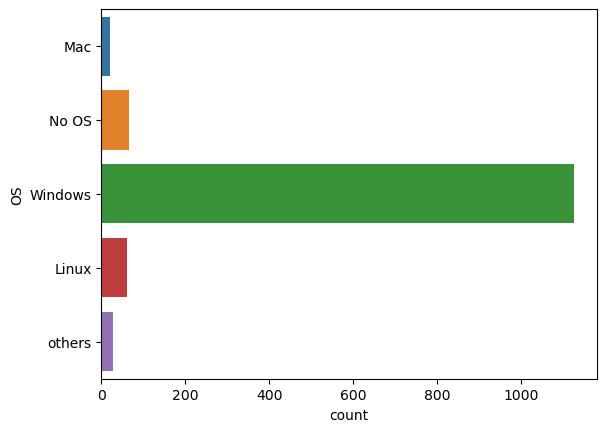

In [61]:
sns.countplot(y=df['OS'])

In [62]:
df.drop(columns = 'OpSys', inplace = True)

<AxesSubplot:xlabel='Price_euros', ylabel='OS'>

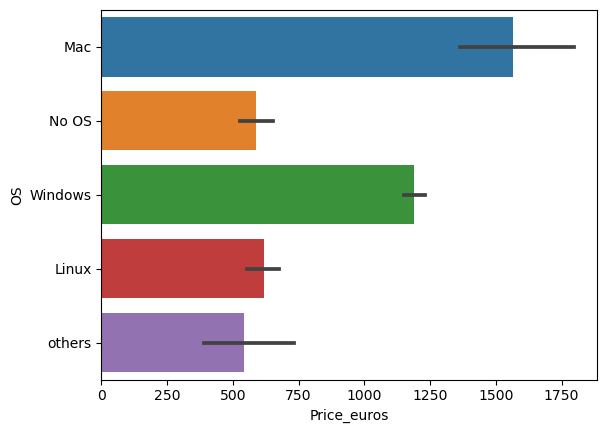

In [63]:
sns.barplot(y=df['OS'],x=df['Price_euros'])

## Weight

In [64]:
df['Weight'] = df['Weight'].str.replace('kg', '')

In [65]:
df['Weight'] = df['Weight'].astype('float32')

<AxesSubplot:xlabel='Weight', ylabel='Density'>

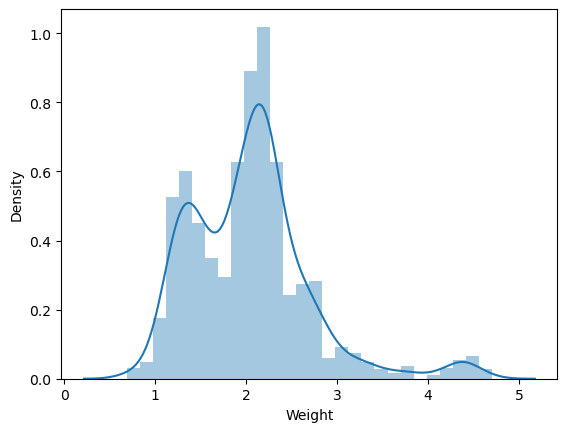

In [66]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price_euros'>

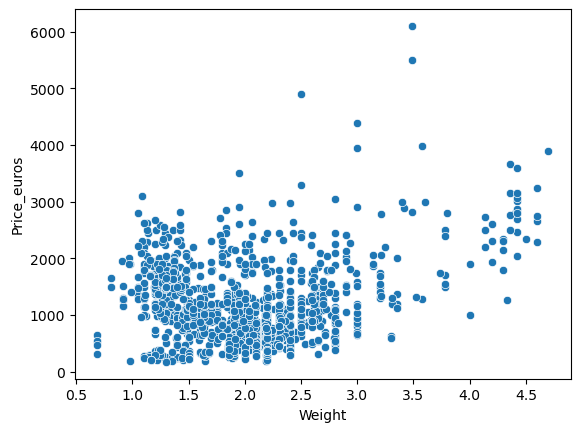

In [67]:
sns.scatterplot(x=df['Weight'],y=df['Price_euros'])

In [68]:
df.corr()['Price_euros']

Ram            0.742905
Weight         0.209867
Price_euros    1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price_euros, dtype: float64

# Model

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   Product      1302 non-null   object 
 2   TypeName     1302 non-null   object 
 3   Ram          1302 non-null   int32  
 4   Weight       1302 non-null   float32
 5   Price_euros  1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   Ips          1302 non-null   int64  
 8   ppi          1302 non-null   float64
 9   Cpu brand    1302 non-null   object 
 10  HDD          1302 non-null   int64  
 11  SSD          1302 non-null   int64  
 12  Gpu brand    1302 non-null   object 
 13  OS           1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(6)
memory usage: 142.4+ KB


In [70]:
X = df.drop(columns=['Price_euros'])
Y = df['Price_euros']

In [71]:
X['Company']= le.fit_transform(X['Company'])
X['Product']= le.fit_transform(X['Product'])
X['TypeName']= le.fit_transform(X['TypeName'])
X['Cpu brand']= le.fit_transform(X['Cpu brand'])
X['Gpu brand']= le.fit_transform(X['Gpu brand'])
X['OS']= le.fit_transform(X['OS'])

X.head()

,Company,Product,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,1,299,4,8,1.37,0,1,226.983005,2,0,128,1,1
1,1,300,4,8,1.34,0,0,127.677940,2,0,0,1,1
2,7,50,3,8,1.86,0,0,141.211998,2,0,256,1,2
3,1,299,4,16,1.83,0,1,220.534624,3,0,512,0,1
4,1,299,4,8,1.37,0,1,226.983005,2,0,256,1,1


In [72]:
Y.head()

0    1339.69
1     898.94
2     575.00
3    2537.45
4    1803.60
Name: Price_euros, dtype: float64

In [74]:
df_encoded = df
df_encoded['Company']= le.fit_transform(df_encoded['Company'])
df_encoded['Product']= le.fit_transform(df_encoded['Product'])
df_encoded['TypeName']= le.fit_transform(df_encoded['TypeName'])
df_encoded['Cpu brand']= le.fit_transform(df_encoded['Cpu brand'])
df_encoded['Gpu brand']= le.fit_transform(df_encoded['Gpu brand'])
df_encoded['OS']= le.fit_transform(df_encoded['OS'])

In [75]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   int64  
 1   Product      1302 non-null   int64  
 2   TypeName     1302 non-null   int64  
 3   Ram          1302 non-null   int32  
 4   Weight       1302 non-null   float32
 5   Price_euros  1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   Ips          1302 non-null   int64  
 8   ppi          1302 non-null   float64
 9   Cpu brand    1302 non-null   int64  
 10  HDD          1302 non-null   int64  
 11  SSD          1302 non-null   int64  
 12  Gpu brand    1302 non-null   int64  
 13  OS           1302 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(10)
memory usage: 142.4 KB


In [76]:
 y, X = dmatrices('Price_euros ~ Company + Product + TypeName + Ram + Weight + Touchscreen + Ips + ppi + Cpu brand + HDD + SSD + Gpu brand + OS'
                  , data=df_encoded, return_type='dataframe')

SyntaxError: invalid syntax (<unknown>, line 1)

In [73]:
results = smf.ols(Y,X).fit()
print(results.summary())

PatsyError: model is missing required outcome variables